Reference Link: https://keras.io/api/applications/

**1. Import all the required libraries**

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
## resize the image
IMAGE_SIZE = [224, 224]

In [3]:
## train and test image path
train_path = "/content/drive/MyDrive/GeeksforGeeks Sessions/Transfer Learning using Pretrained Models/Dataset/Training"
test_path =  "/content/drive/MyDrive/GeeksforGeeks Sessions/Transfer Learning using Pretrained Models/Dataset/Testing"

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [5]:
## don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [6]:
## to check the number of classes in this particular usecase
folders = glob('/content/drive/MyDrive/GeeksforGeeks Sessions/Transfer Learning using Pretrained Models/Dataset/Training/*')

In [7]:
print(len(folders))

3


In [8]:
# Flatten layer addition
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
## Create a object of the model
model = Model(inputs=vgg.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

**Data Augmentation**

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/GeeksforGeeks Sessions/Transfer Learning using Pretrained Models/Dataset/Training',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/GeeksforGeeks Sessions/Transfer Learning using Pretrained Models/Dataset/Testing',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


In [13]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-13-39a22121036e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/5
11/11 [==============================] - 249s 22s/step - loss: 1.2766 - accuracy: 0.3796 - val_loss: 1.1492 - val_accuracy: 0.3750
Epoch 2/5
11/11 [==============================] - 5s 443ms/step - loss: 1.0070 - accuracy: 0.4722 - val_loss: 1.0698 - val_accuracy: 0.4688
Epoch 3/5
11/11 [==============================] - 5s 482ms/step - loss: 0.8764 - accuracy: 0.6049 - val_loss: 0.9663 - val_accuracy: 0.5625
Epoch 4/5
11/11 [==============================] - 5s 474ms/step - loss: 0.8312 - accuracy: 0.6204 - val_loss: 0.9711 - val_accuracy: 0.5234
Epoch 5/5
11/11 [==============================] - 5s 478ms/step - loss: 0.9001 - accuracy: 0.5772 - val_loss: 1.4868 - val_accuracy: 0.3125


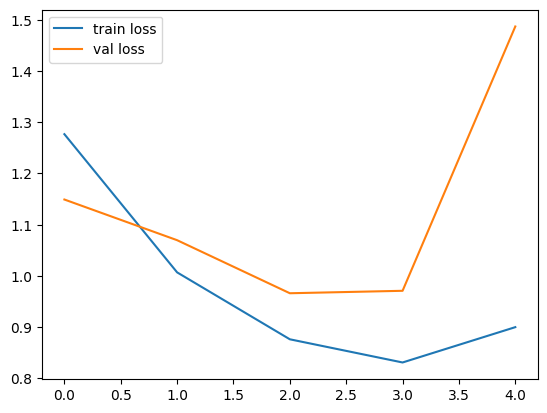

<Figure size 640x480 with 0 Axes>

In [14]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

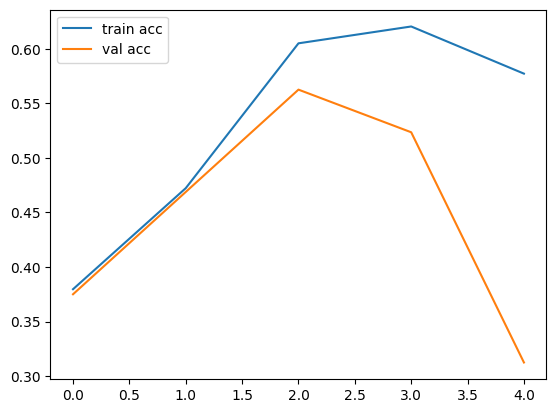

<Figure size 640x480 with 0 Axes>

In [15]:
## accuracy of train and test set
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
## to save the model
## very important
import tensorflow as tf
from keras.models import load_model
model.save('Emotions_model.h5')

**Research Work: Explore how we get the probability of those three classes happy, sad and neutral if user will give the image to the model.**

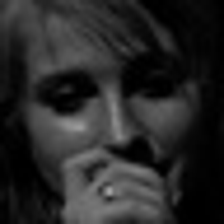

In [17]:
import PIL.Image as Image
sadImage = Image.open('/content/drive/MyDrive/GeeksforGeeks Sessions/Transfer Learning using Pretrained Models/Dataset/Testing/Sad/Sad-933.jpg').resize(IMAGE_SIZE)
sadImage